# 📈 Stock Price Analysis & Prediction Using Yahoo Finance Dataset

## 📝 Introduction
This notebook aims to analyze **Yahoo Finance stock data over a one-year period** using **Exploratory Data Analysis (EDA)**. We will also develop a **predictive model** for forecasting stock price movements.

## 🎯 Task Description
This notebook is based on **Dataguess Technologies' Machine Learning Engineer Assignment**. The goal is to build a model that predicts **future stock price movements** using **historical financial data**. The task involves:

- 📊 **Data Preprocessing:** Cleaning and structuring stock market data.
- 🔍 **Feature Engineering:** Adding financial indicators such as RSI, MACD, and Bollinger Bands.
- 🏗 **Model Development:** Implementing an LSTM-based deep learning model for stock price forecasting.
- 📈 **Performance Evaluation:** Assessing the model using appropriate financial metrics.

## 📌 Dataset & Tools
We will be using **Yahoo Finance API** to fetch stock market data, including **Open, High, Low, Close, and Volume**. The analysis will involve Python libraries such as:

- `pandas` 🐼 for data manipulation
- `numpy` 🔢 for numerical operations
- `seaborn` & `matplotlib` 📊 for visualization
- `scikit-learn` 🤖 for preprocessing
- `TensorFlow/Keras` 🧠 for deep learning (LSTM)
Stay tuned as we dive into **financial data analysis and stock price prediction!** 🚀

## 📌 Importing Required Libraries

Before analyzing stock market data, we need to set up the required libraries and dependencies.

- `%%capture`: Suppresses unnecessary output when running commands.
- `!pip install yfinance`: Installs the `yfinance` package for fetching stock data.
- `pandas`: Handles data manipulation and DataFrames.
- `seaborn` & `matplotlib`: Used for data visualization and plotting.
- `yfinance`: Retrieves stock market data from Yahoo Finance.
- `datetime`: Manages date and time operations.
- `numpy`: Provides numerical computing support.
- `itertools`: Helps generate stock pair combinations for correlation analysis.
- `IPython.display`: Enhances table and DataFrame visualization in Jupyter notebooks.

This setup ensures we have the **necessary tools for stock price analysis, visualization, and machine learning modeling.** 🚀

In [1]:
%%capture
!pip install yfinance

import pandas   as pd             
import seaborn  as sns           
import matplotlib.pyplot as plt   
import yfinance as yf 
from datetime import datetime
import numpy as np
from itertools import combinations
from IPython.display import display
import warnings


warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## 📌 Defining Stock Symbols & Data Fetching Parameters

To analyze stock market data, we define a list of **technology company stocks** and set the parameters for data retrieval.

- **`tech_list`**: A list of stock symbols from major technology companies:
  - `AAPL` - Apple Inc.
  - `GOOG` - Alphabet (Google)
  - `MSFT` - Microsoft Corporation
  - `AMZN` - Amazon.com Inc.

- **Data Fetching Parameters**:
  - **`yf_period = "1y"`** → Fetches data for the **last 1 year**.
  - **`yf_interval = "1d"`** → Retrieves **daily stock price data**.

These settings ensure that we obtain **daily stock price movements for the past year**, allowing us to analyze trends and develop predictive models. 📊

In [2]:
# List of technology stocks to analyze
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Data fetching parameters
yf_period = "10y"   # Last 1 year of data
yf_interval = "1d"  # Daily interval

## 📥 Data Loading

To analyze stock market trends, we first **fetch historical stock data** from Yahoo Finance and store it in a structured format.

In [3]:
# Create an empty dictionary to store stock data
data_dict = {}

# Download and merge data for each stock
for stock in tech_list:
    data = yf.download(stock, period=yf_period, interval=yf_interval)
    
    # Rename columns to avoid MultiIndex issues
    data = data.add_suffix(f"_{stock}")
    
    # Store the data in the dictionary
    data_dict[stock] = data

# Concatenate all stock data horizontally (axis=1)
df = pd.concat(data_dict.values(), axis=1)

# Display the first few rows
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close_AAPL,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Adj Close_GOOG,Close_GOOG,High_GOOG,Low_GOOG,...,High_MSFT,Low_MSFT,Open_MSFT,Volume_MSFT,Adj Close_AMZN,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,Volume_AMZN
Ticker,AAPL_AAPL,AAPL_AAPL,AAPL_AAPL,AAPL_AAPL,AAPL_AAPL,AAPL_AAPL,GOOG_GOOG,GOOG_GOOG,GOOG_GOOG,GOOG_GOOG,...,MSFT_MSFT,MSFT_MSFT,MSFT_MSFT,MSFT_MSFT,AMZN_AMZN,AMZN_AMZN,AMZN_AMZN,AMZN_AMZN,AMZN_AMZN,AMZN_AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-29,26.478359,29.725000,29.797501,28.889999,29.080000,337745600,25.371929,25.463091,25.484531,24.991386,...,42.119999,40.790001,40.930000,63585300,15.589000,15.589000,15.640000,14.966500,15.236500,173132000
2015-01-30,26.090870,29.290001,30.000000,29.212500,29.600000,334982000,26.557402,26.652824,26.919592,25.705425,...,41.580002,40.349998,41.549999,78004900,17.726500,17.726500,17.975000,17.037001,17.316000,477122000
2015-02-02,26.418234,29.657499,29.792500,29.020000,29.512501,250956400,26.257307,26.351652,26.577032,25.856510,...,41.369999,40.230000,40.590000,50352500,18.223499,18.223499,18.250000,17.500500,17.502501,204638000
2015-02-03,26.422686,29.662500,29.772499,29.402500,29.625000,207662800,26.295067,26.389547,26.596977,26.091366,...,41.930000,41.049999,41.630001,52082400,18.177500,18.177500,18.391001,18.010500,18.014500,124252000
2015-02-04,26.625334,29.889999,30.127501,29.577499,29.625000,280598800,25.973110,26.066435,26.560678,25.992140,...,42.209999,41.360001,41.939999,41614800,18.237499,18.237499,18.375000,17.911501,17.919001,83398000


In [4]:
# If column names are tuples (MultiIndex), flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]


In [5]:

# Extract data separately for each stock
aapl_df = df.filter(like="_AAPL")  # Select columns ending with "_AAPL"
goog_df = df.filter(like="_GOOG")  # Select columns ending with "_GOOG"
msft_df = df.filter(like="_MSFT")  # Select columns ending with "_MSFT"
amzn_df = df.filter(like="_AMZN")  # Select columns ending with "_AMZN"

# Clean column names (e.g., change "Close_AAPL" to "Close")
aapl_df.columns = [col.replace("_AAPL", "") for col in aapl_df.columns]
goog_df.columns = [col.replace("_GOOG", "") for col in goog_df.columns]
msft_df.columns = [col.replace("_MSFT", "") for col in msft_df.columns]
amzn_df.columns = [col.replace("_AMZN", "") for col in amzn_df.columns]

# Display basic statistics for AAPL
print("📊 AAPL Stock Statistics")
display(aapl_df.describe())

print("\n📌 AAPL Data Information")
display(aapl_df.info())

# Display basic statistics for GOOG
print("\n📊 GOOG Stock Statistics")
display(goog_df.describe())

print("\n📌 GOOG Data Information")
display(goog_df.info())


📊 AAPL Stock Statistics


,Adj Close,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,95.727912,97.787812,98.738843,96.731046,97.699589,1.157216e+08
std,66.472572,65.973496,66.581145,65.275184,65.900478,6.713606e+07
min,20.697269,22.584999,22.917500,22.367500,22.500000,2.323470e+07
25%,35.919157,38.322500,38.542500,37.942501,38.375000,7.043715e+07
50%,67.278992,69.232498,70.305000,68.239998,69.285004,9.904760e+07
75%,152.433662,154.380005,156.195000,152.309998,153.829994,1.408545e+08
max,259.019989,259.019989,260.100006,257.630005,258.190002,6.488252e+08



📌 AAPL Data Information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-29 to 2025-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2515 non-null   float64
 1   Close      2515 non-null   float64
 2   High       2515 non-null   float64
 3   Low        2515 non-null   float64
 4   Open       2515 non-null   float64
 5   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


None


📊 GOOG Stock Statistics


,Adj Close,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,83.691329,83.967472,84.819313,83.087574,83.914479,3.057741e+07
std,45.138510,45.248723,45.744415,44.772435,45.228616,1.535151e+07
min,25.371929,25.463091,25.484531,24.991386,25.480045,6.809800e+06
25%,46.658104,46.825750,47.100500,46.389751,46.731251,2.108600e+07
50%,65.715881,65.952003,66.385002,65.254997,65.750000,2.678010e+07
75%,122.390244,122.830002,123.710003,121.474998,122.264999,3.532500e+07
max,201.899994,201.899994,203.839996,199.783997,200.550003,2.232980e+08



📌 GOOG Data Information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-29 to 2025-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2515 non-null   float64
 1   Close      2515 non-null   float64
 2   High       2515 non-null   float64
 3   Low        2515 non-null   float64
 4   Open       2515 non-null   float64
 5   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


None

In [6]:
# Function to analyze missing values in each dataset
def missing_values_info(df, company_name):
    missing_values = df.isna().sum()
    missing_percentage = (df.isna().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        "Column": df.columns,
        "Missing Values": missing_values.values,
        "Missing Percentage (%)": missing_percentage.values
    })
    
    return missing_df

# Compute missing value statistics for each company
aapl_missing = missing_values_info(aapl_df, "APPLE")
goog_missing = missing_values_info(goog_df, "GOOGLE")
msft_missing = missing_values_info(msft_df, "MICROSOFT")
amzn_missing = missing_values_info(amzn_df, "AMAZON")

print("\n📌 Missing Value Analysis")
display(aapl_missing, goog_missing, msft_missing, amzn_missing)


📌 Missing Value Analysis


,Column,Missing Values,Missing Percentage (%)
0,Adj Close,0,0.0
1,Close,0,0.0
2,High,0,0.0
3,Low,0,0.0
4,Open,0,0.0
5,Volume,0,0.0


,Column,Missing Values,Missing Percentage (%)
0,Adj Close,0,0.0
1,Close,0,0.0
2,High,0,0.0
3,Low,0,0.0
4,Open,0,0.0
5,Volume,0,0.0


,Column,Missing Values,Missing Percentage (%)
0,Adj Close,0,0.0
1,Close,0,0.0
2,High,0,0.0
3,Low,0,0.0
4,Open,0,0.0
5,Volume,0,0.0


,Column,Missing Values,Missing Percentage (%)
0,Adj Close,0,0.0
1,Close,0,0.0
2,High,0,0.0
3,Low,0,0.0
4,Open,0,0.0
5,Volume,0,0.0


In [7]:
company_data = {
    "APPLE": aapl_df,
    "GOOGLE": goog_df,
    "MICROSOFT": msft_df,
    "AMAZON": amzn_df
}

## 📊 Visualizing Stock Closing Prices


<ipython-input-8-7cc57bdf98ac>:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


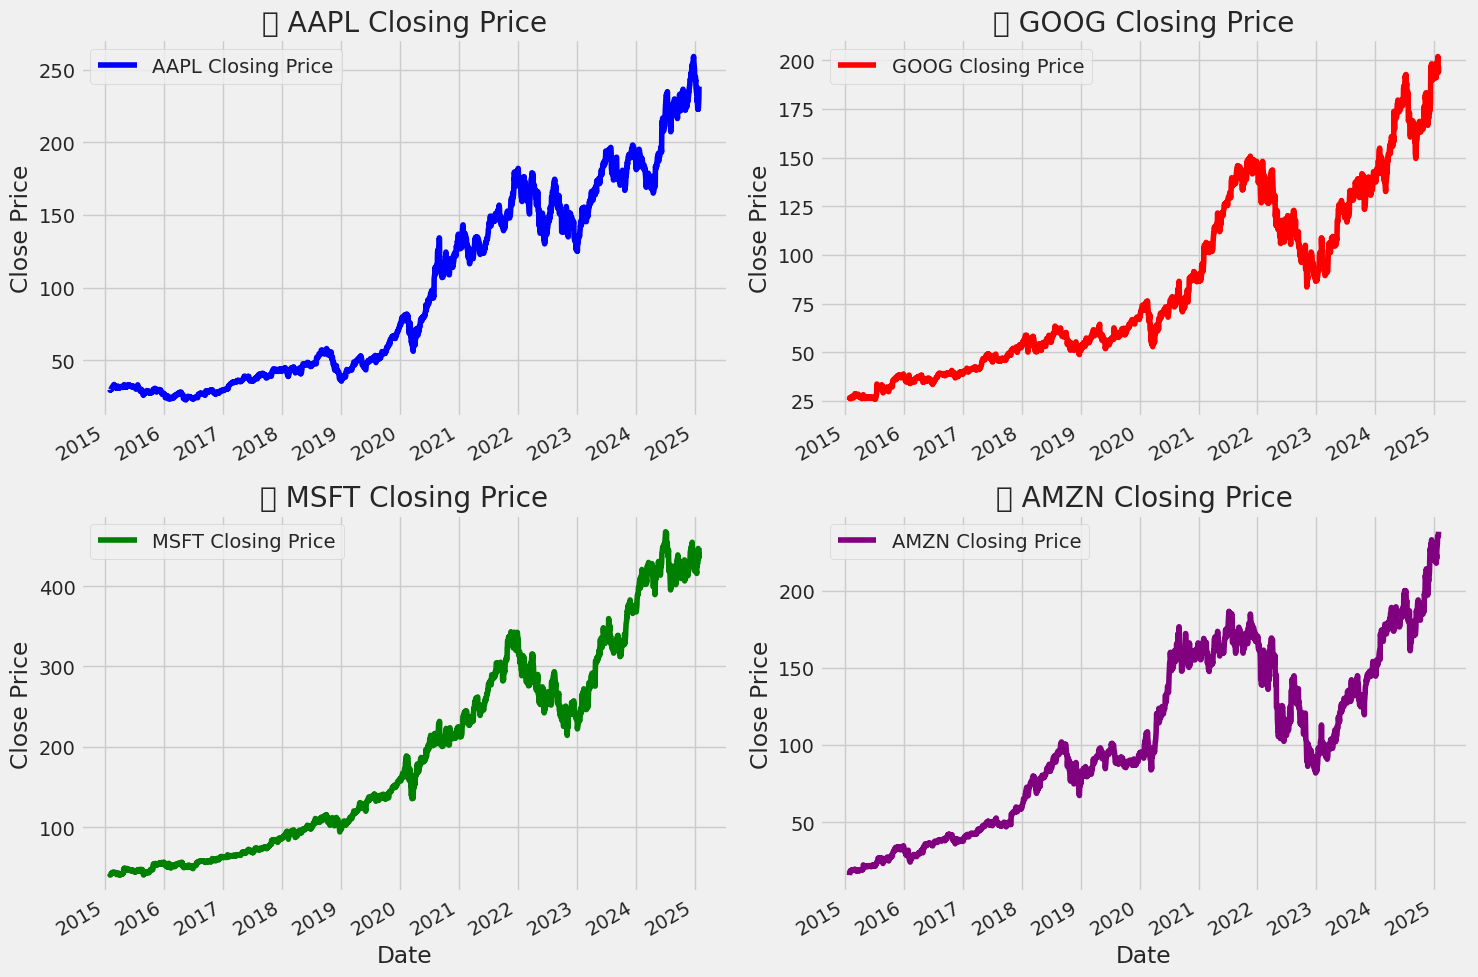

In [8]:
# Set figure size
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.1, bottom=0.1)

# List of stocks and their corresponding colors
stocks = [("AAPL", aapl_df, "blue"), 
          ("GOOG", goog_df, "red"), 
          ("MSFT", msft_df, "green"), 
          ("AMZN", amzn_df, "purple")]

# Plot each stock's closing price in a separate subplot
for i, (stock_name, stock_df, color) in enumerate(stocks, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    stock_df["Close"].plot(color=color, label=f"{stock_name} Closing Price")
    plt.ylabel('Close Price')
    plt.xlabel(None if i < 3 else "Date")  # Remove x-axis label for the first row
    plt.title(f"📈 {stock_name} Closing Price")
    plt.legend()

# Adjust layout automatically
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-9-f51f80ce4082>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


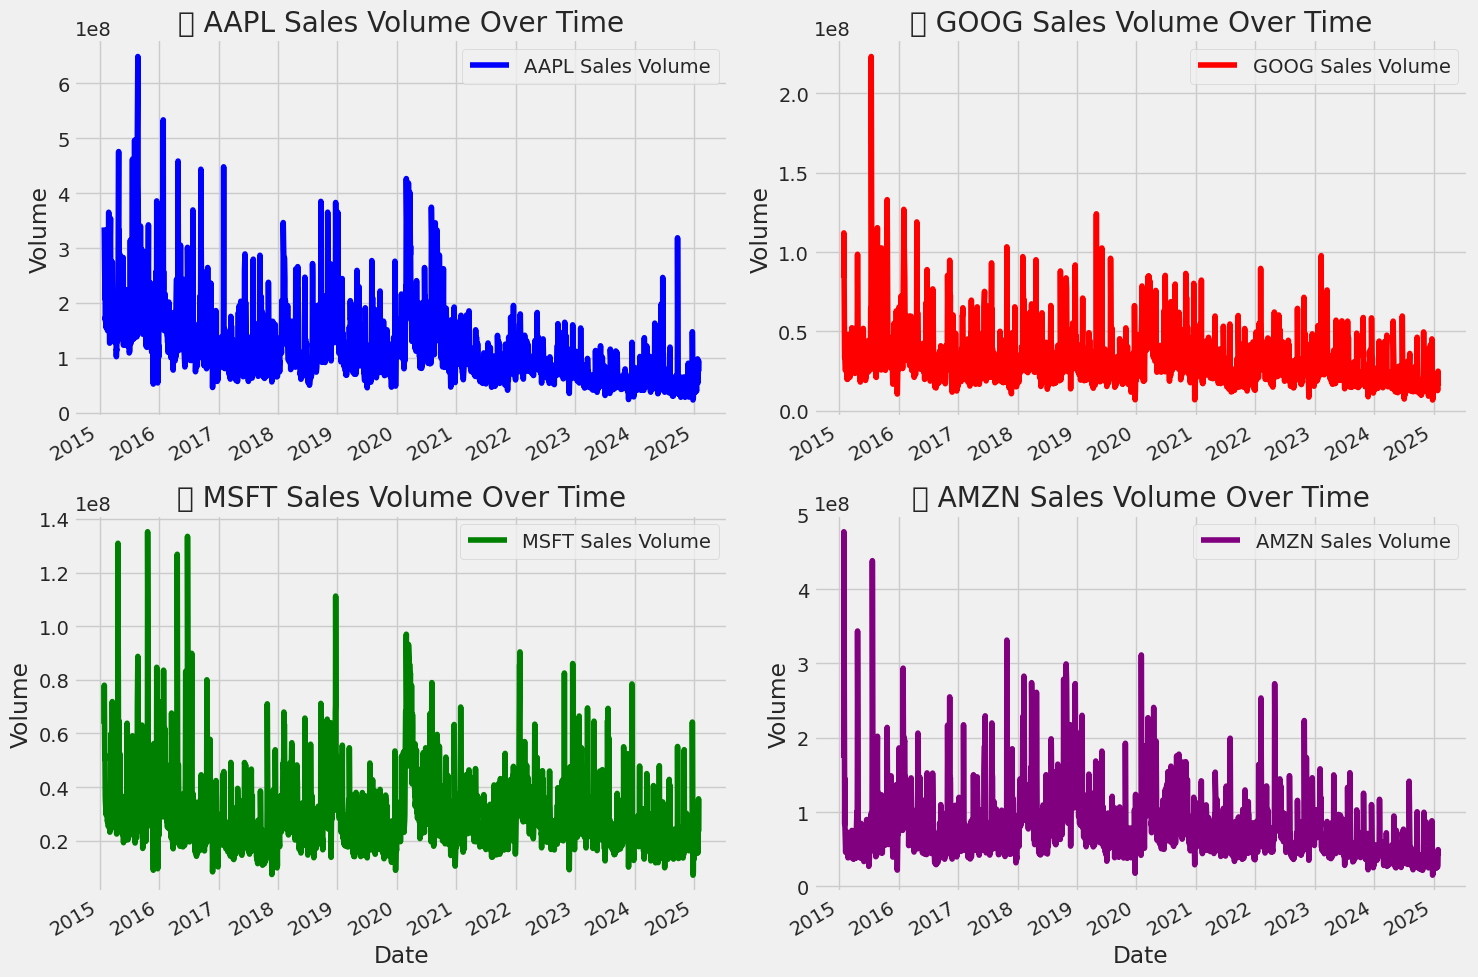

In [9]:
# Set figure size
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.1, bottom=0.1)

# Plot each stock's sales volume in a separate subplot
for i, (stock_name, stock_df, color) in enumerate(stocks, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    stock_df["Volume"].plot(color=color, label=f"{stock_name} Sales Volume")
    plt.ylabel('Volume')
    plt.xlabel(None if i < 3 else "Date")  # Remove x-axis label for the first row
    plt.title(f"📊 {stock_name} Sales Volume Over Time")
    plt.legend()

# Adjust layout automatically
plt.tight_layout()

# Display the plots
plt.show()

### The moving average (MA)

<ipython-input-10-29005cd586a0>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


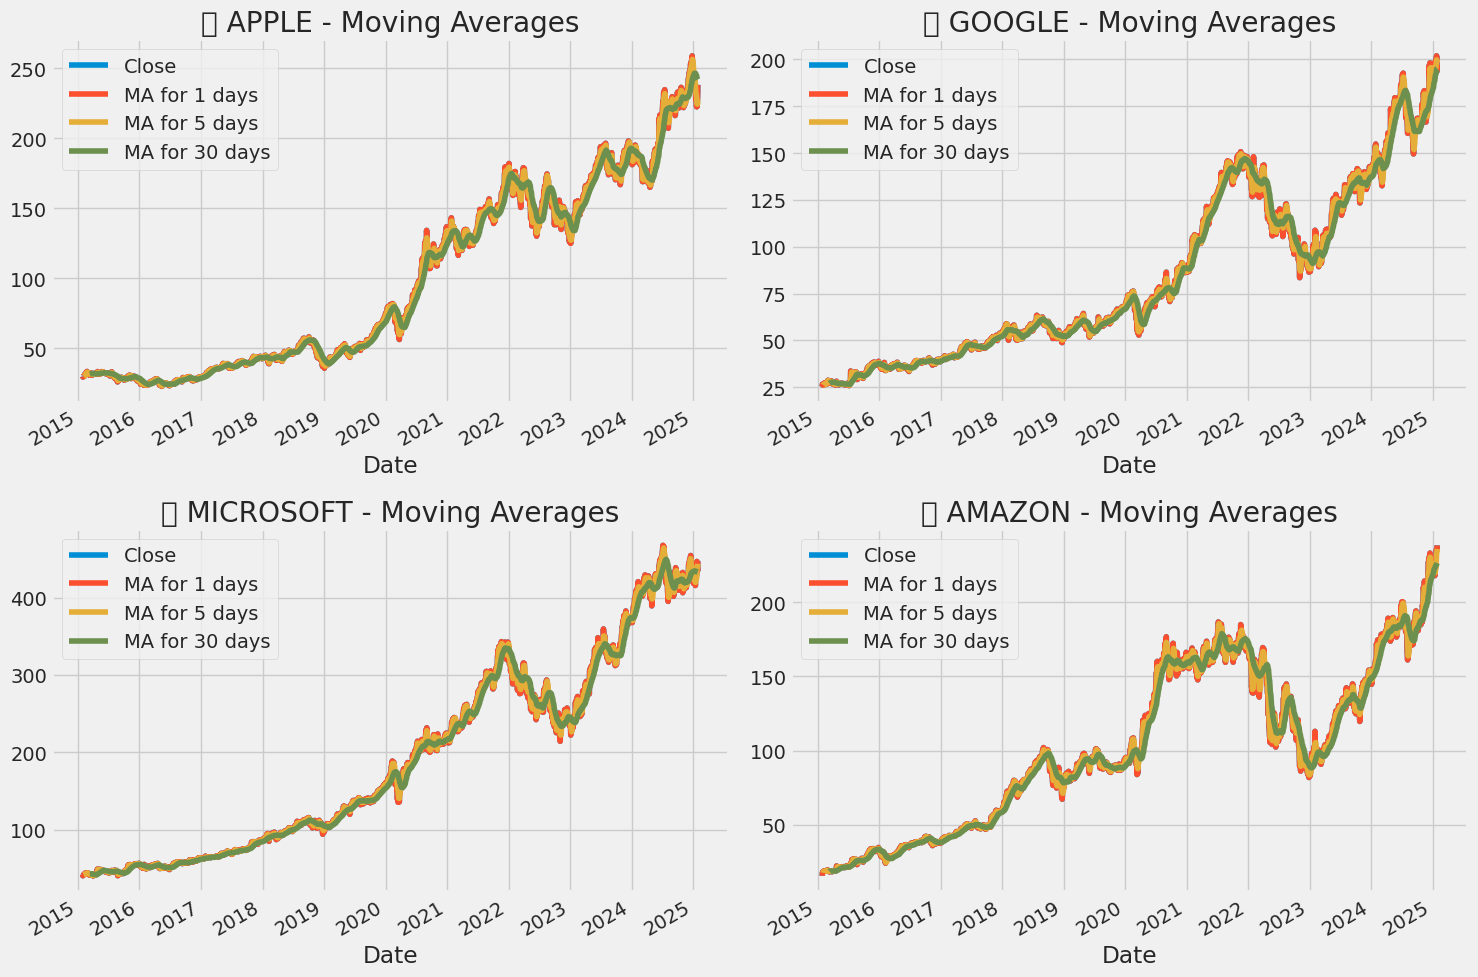

In [10]:
# Moving Average Periods
ma_days = [1, 5, 30]

# Calculate Moving Averages for each company
for company_name, df in company_data.items():
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Close'].rolling(ma).mean()  # Adding Moving Average

# Create plots for Moving Averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Match companies with subplots
for ax, (company_name, df) in zip(axes.flatten(), company_data.items()):
    df[['Close', 'MA for 1 days', 'MA for 5 days', 'MA for 30 days']].plot(ax=ax)
    ax.set_title(f"📊 {company_name} - Moving Averages")

# Adjust layout
fig.tight_layout()
plt.show()

<ipython-input-11-ef5ff6d08fa0>:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


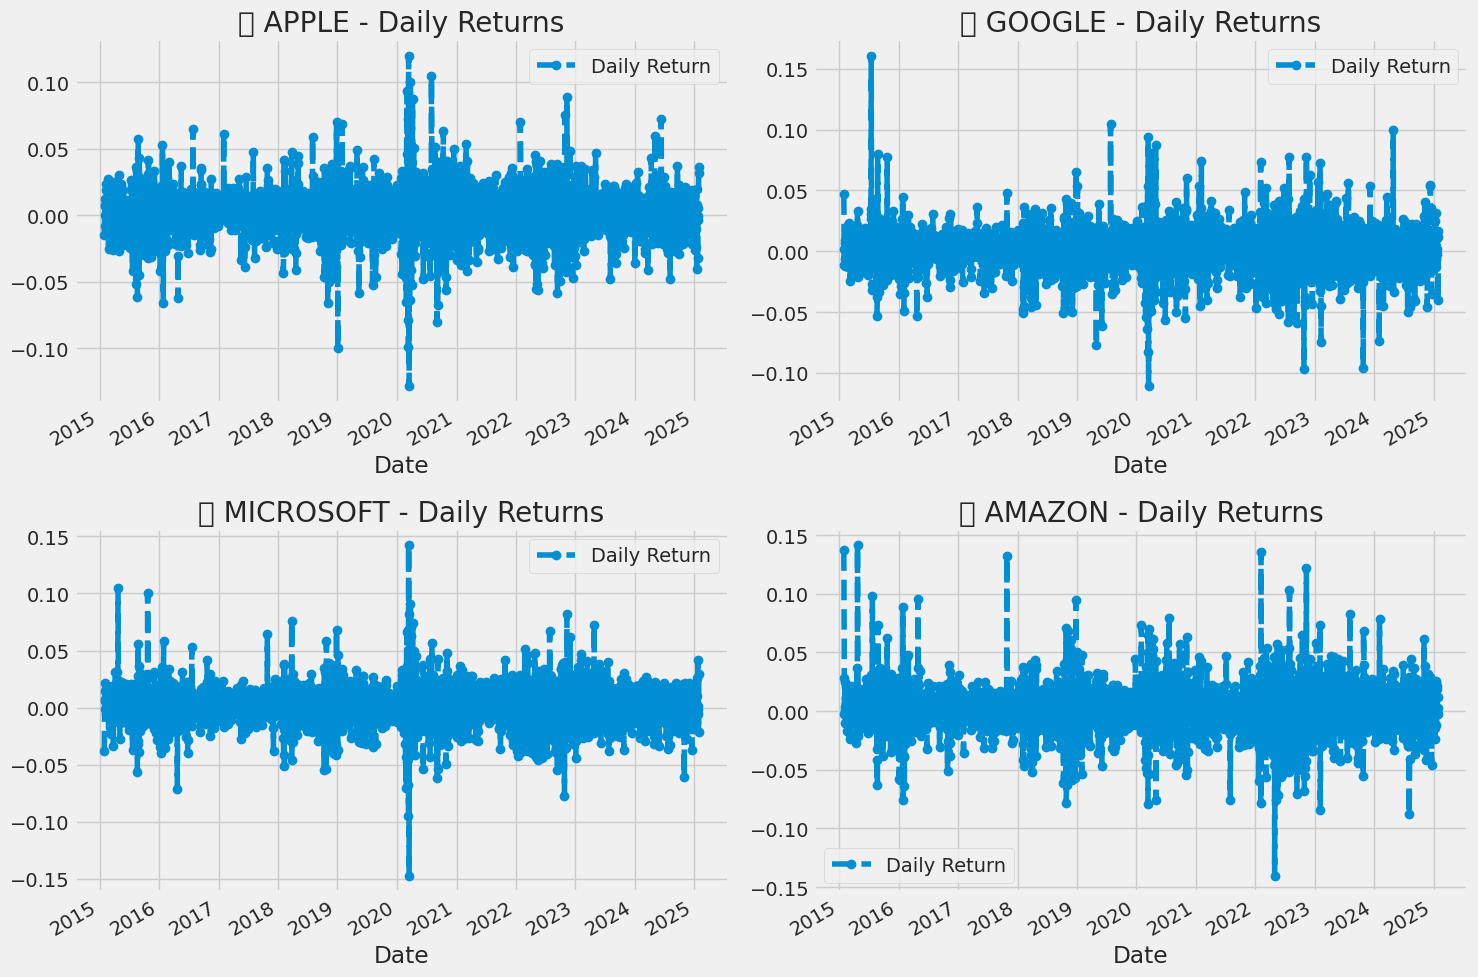

In [11]:
# Calculate Daily Returns
for company_name, df in company_data.items():
    df['Daily Return'] = df['Adj Close'].pct_change()  # Compute percentage change

# Create plots for Daily Returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Match companies with subplots
for ax, (company_name, df) in zip(axes.flatten(), company_data.items()):
    df['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(f"📈 {company_name} - Daily Returns")

# Adjust layout
fig.tight_layout()
plt.show()


<ipython-input-12-ac8c21689208>:13: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


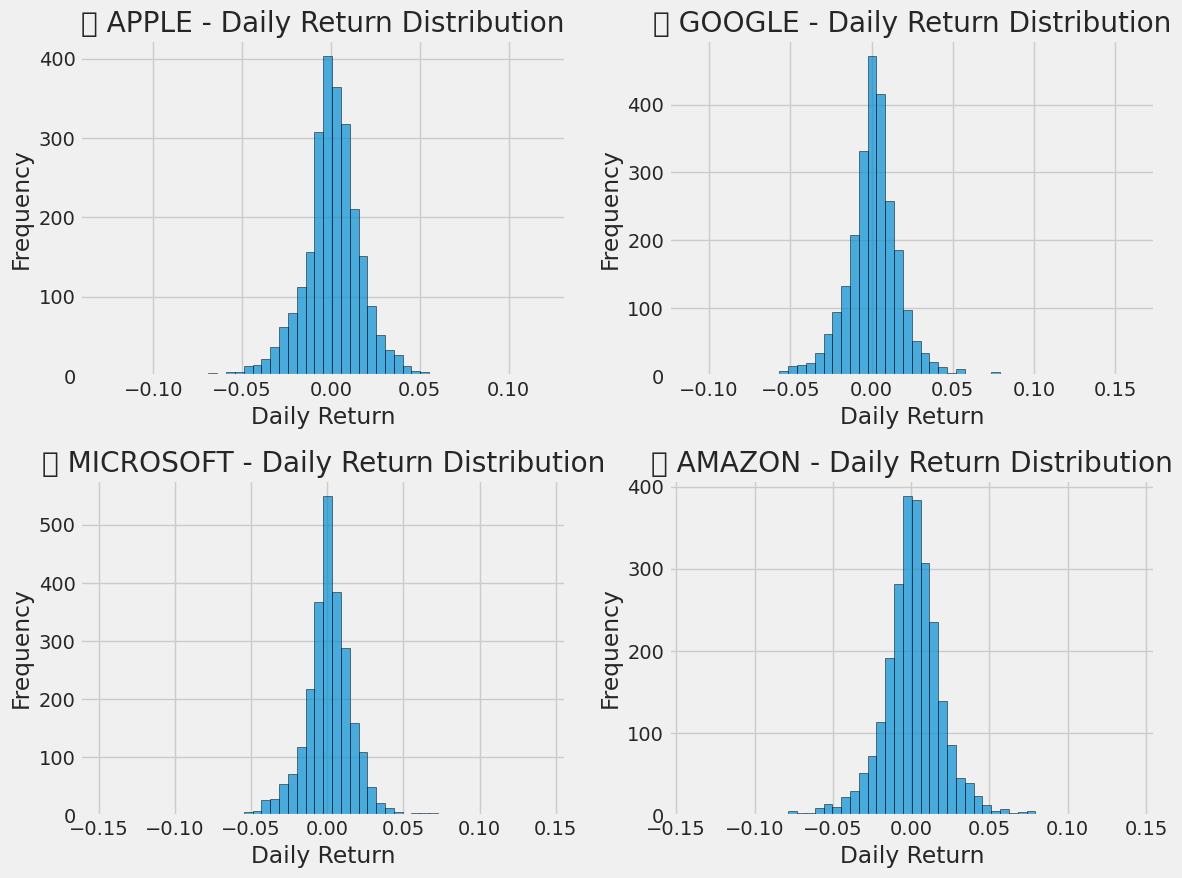

In [12]:
# Set figure size for Daily Return Distribution
plt.figure(figsize=(12, 9))

# Match companies with subplots
for i, (company_name, df) in enumerate(company_data.items(), 1):
    plt.subplot(2, 2, i)
    df['Daily Return'].hist(bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title(f"📉 {company_name} - Daily Return Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
# Combine 'Close' values from all companies into a single DataFrame
closing_df = pd.DataFrame({company: df['Close'] for company, df in company_data.items()})

# Compute daily percentage change (returns)
tech_rets = closing_df.pct_change()
tech_rets = tech_rets[1:]  # Remove the first NaN row

# Display the first 5 rows
print("📊 Daily Returns DataFrame:")
tech_rets.head()

📊 Daily Returns DataFrame:


,APPLE,GOOGLE,MICROSOFT,AMAZON
Date,,,,
2015-01-30,-0.014634,0.046724,-0.038324,0.137116
2015-02-02,0.012547,-0.011300,0.021782,0.028037
2015-02-03,0.000169,0.001438,0.007752,-0.002524
2015-02-04,0.007670,-0.012244,0.005769,0.003301
2015-02-05,0.003178,0.009220,0.014579,0.025058


In [14]:
# Check if there are any infinite values in the dataset
if np.isinf(tech_rets.values).any():
    print("⚠️ The dataset contains `inf` or `-inf` values. Fixing them now...")
    
    # Convert infinite values to NaN
    tech_rets.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Remove NaN values
    tech_rets.dropna(inplace=True)
    
    print("✅ `inf` and `-inf` values have been removed, dataset cleaned!")
else:
    print("✅ No `inf` or `-inf` values found in the dataset.")

✅ No `inf` or `-inf` values found in the dataset.


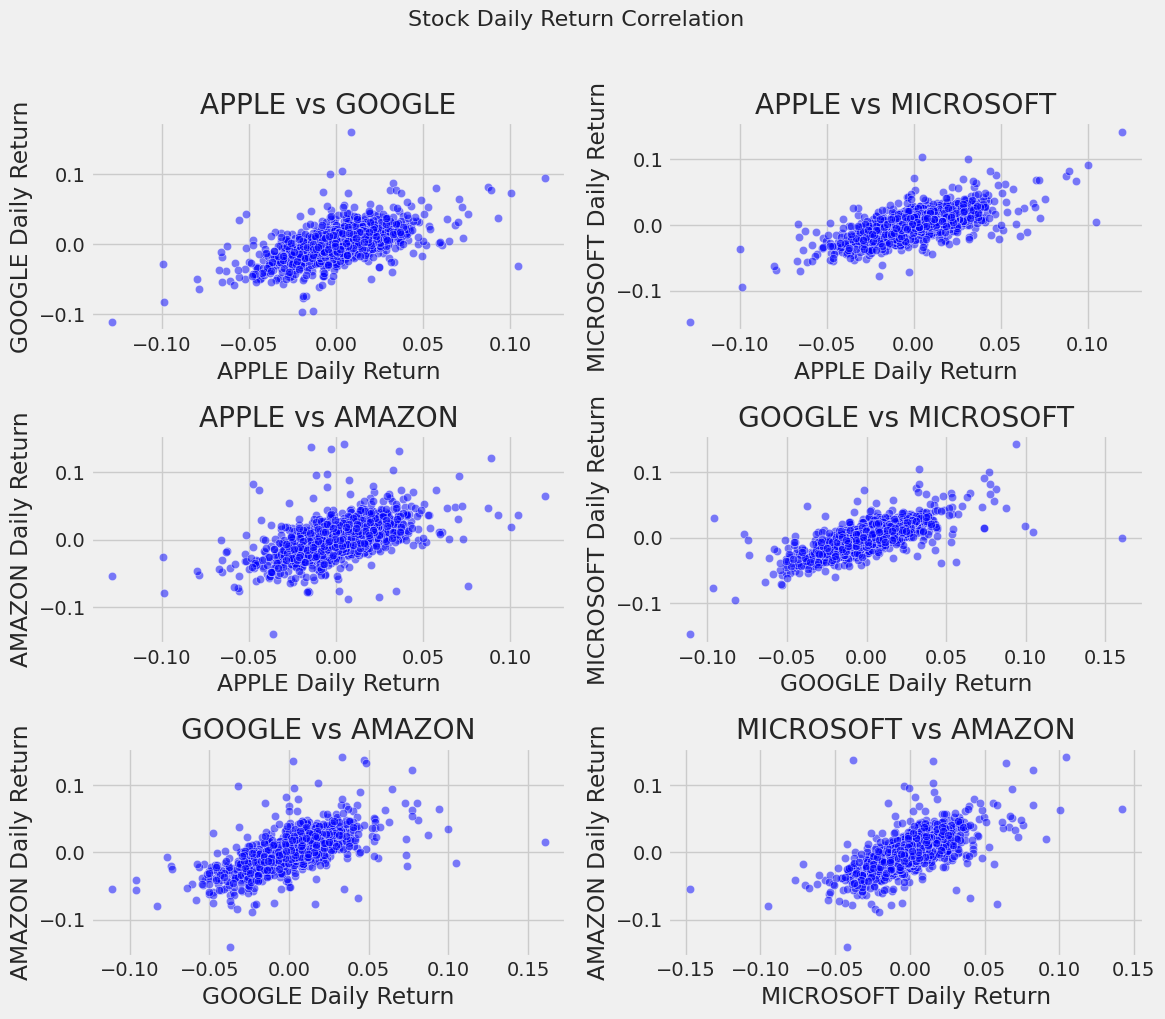

In [15]:
stock_pairs = list(combinations(company_data.keys(), 2))

# Create subplots for scatter plots of stock returns
fig, axes = plt.subplots(nrows=len(stock_pairs)//2, ncols=2, figsize=(12, 10))
fig.suptitle("Stock Daily Return Correlation", fontsize=16, y=1.02)

# Add scatter plots to subplots
for ax, (stock1, stock2) in zip(axes.flatten(), stock_pairs):
    sns.scatterplot(x=tech_rets[stock1], y=tech_rets[stock2], ax=ax, color='blue', alpha=0.5)
    ax.set_xlabel(f"{stock1} Daily Return")
    ax.set_ylabel(f"{stock2} Daily Return")
    ax.set_title(f"{stock1} vs {stock2}")

plt.tight_layout()
plt.show()

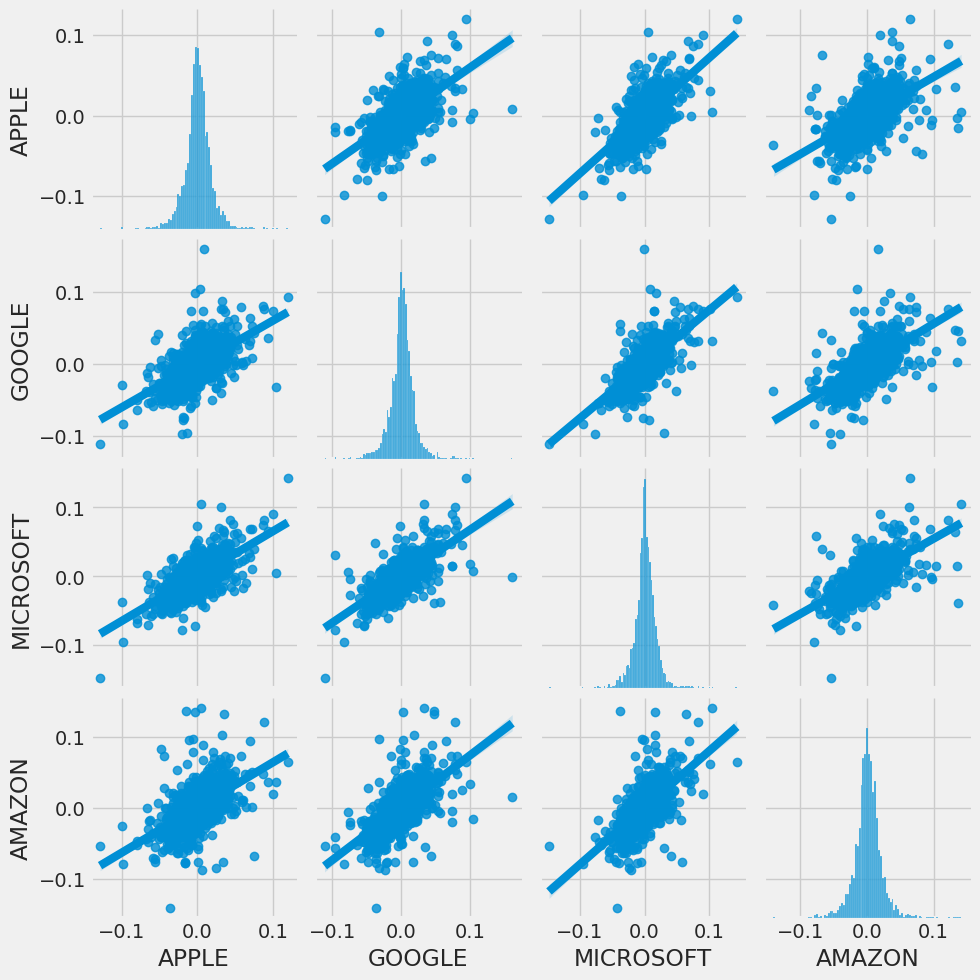

In [16]:
sns.pairplot(tech_rets, kind='reg')

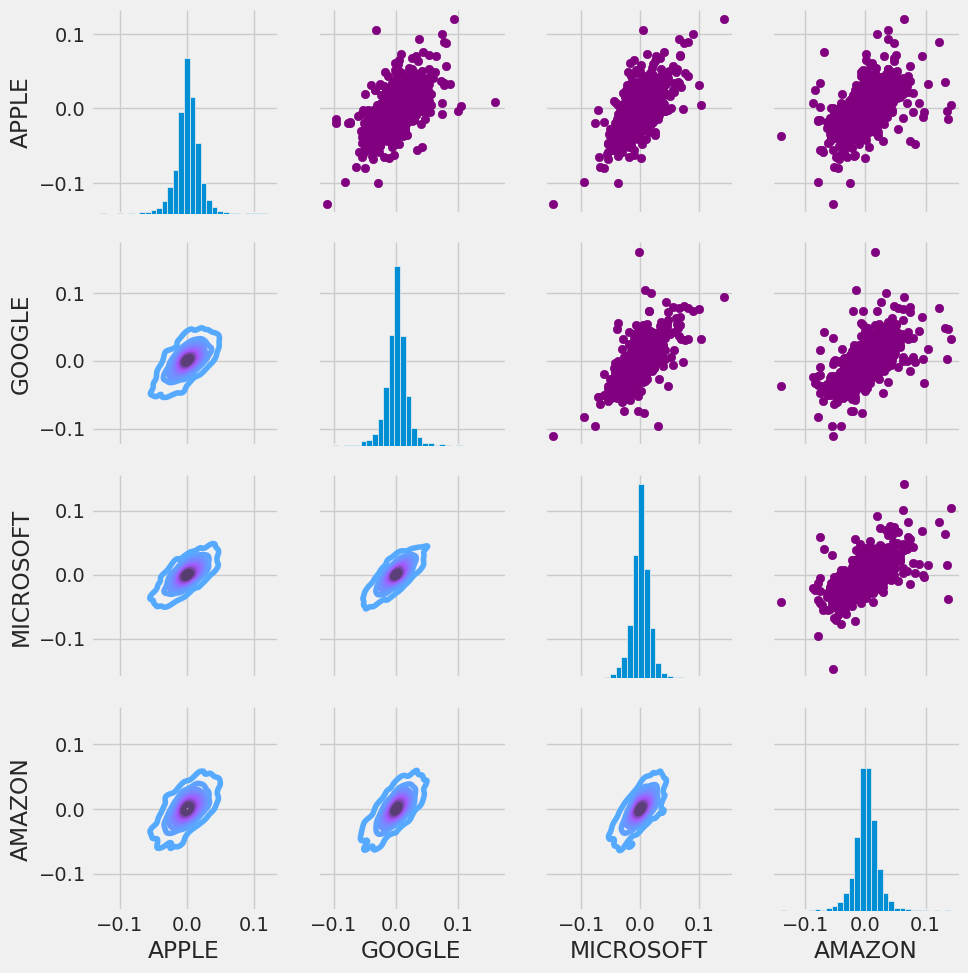

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

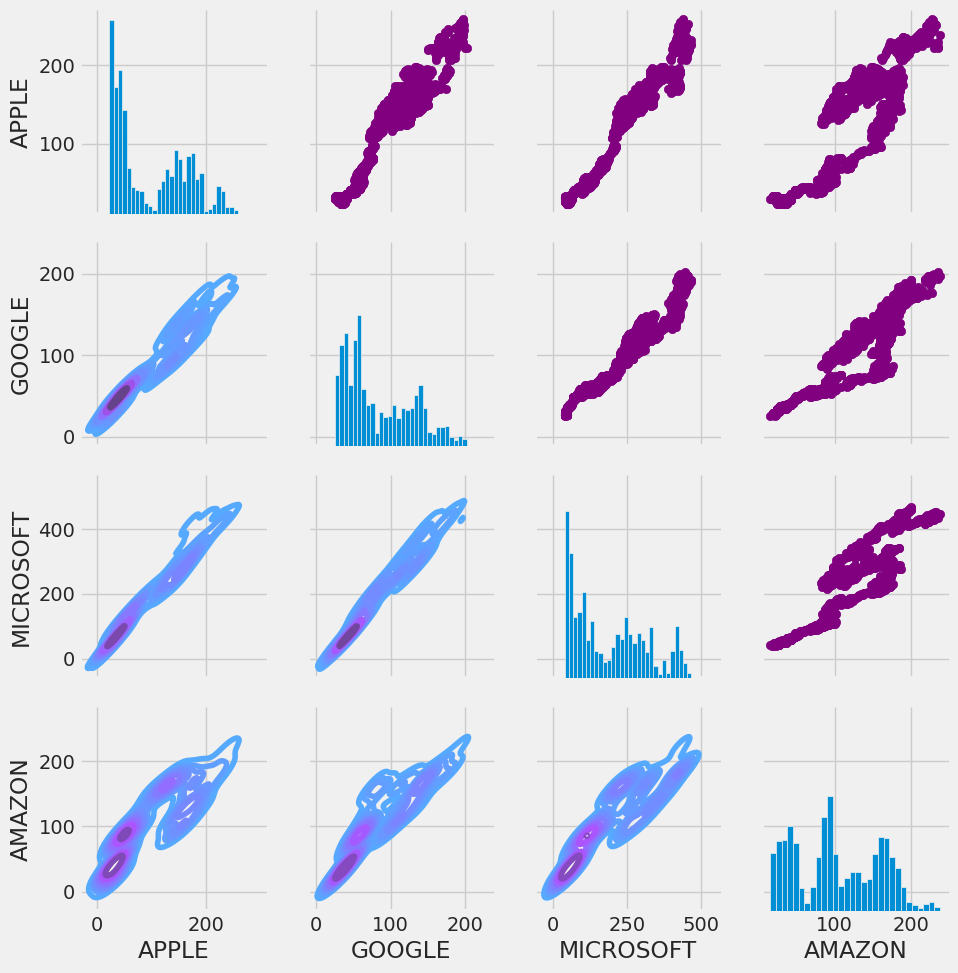

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

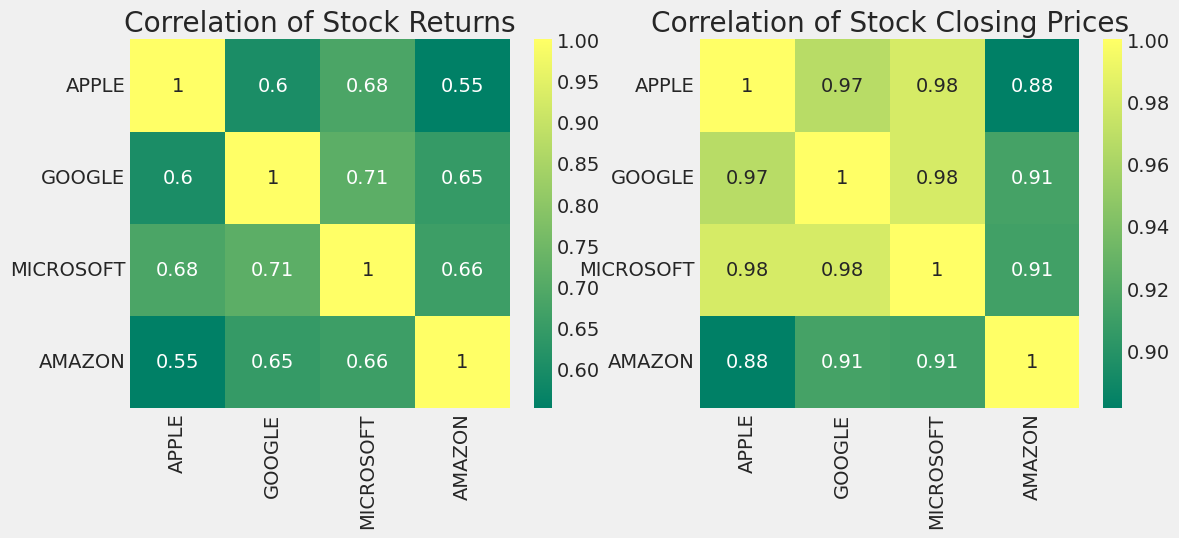

In [19]:
# Heatmaps for correlation analysis
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Prices')

plt.show()

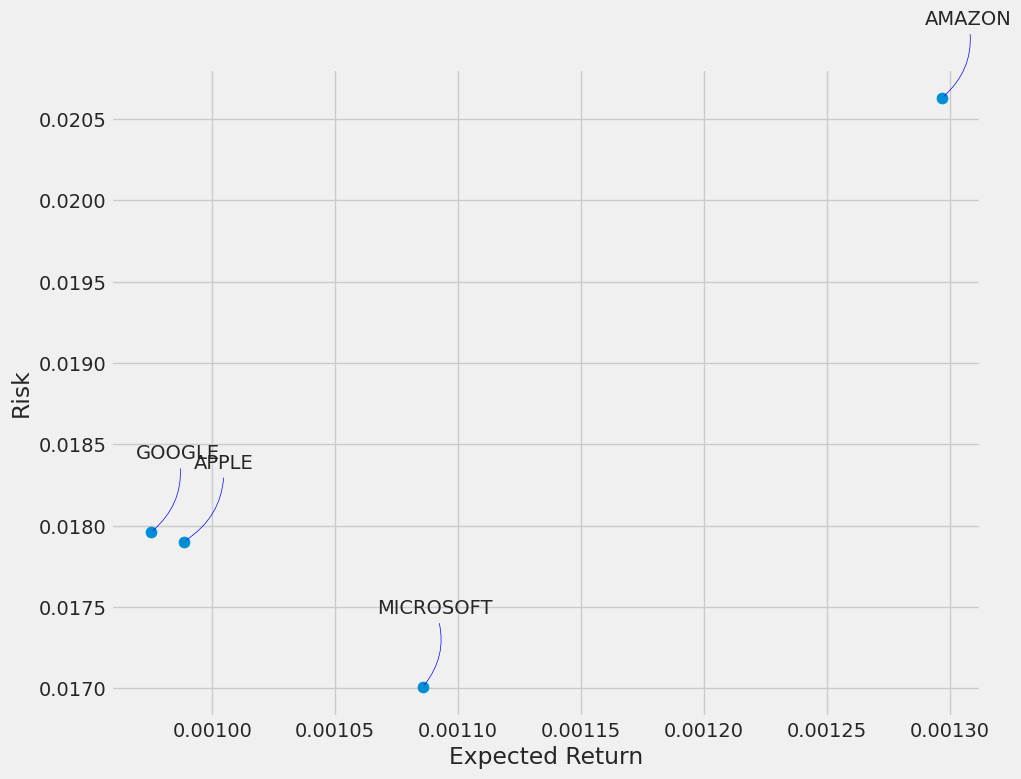

In [20]:
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Annotate stock names
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


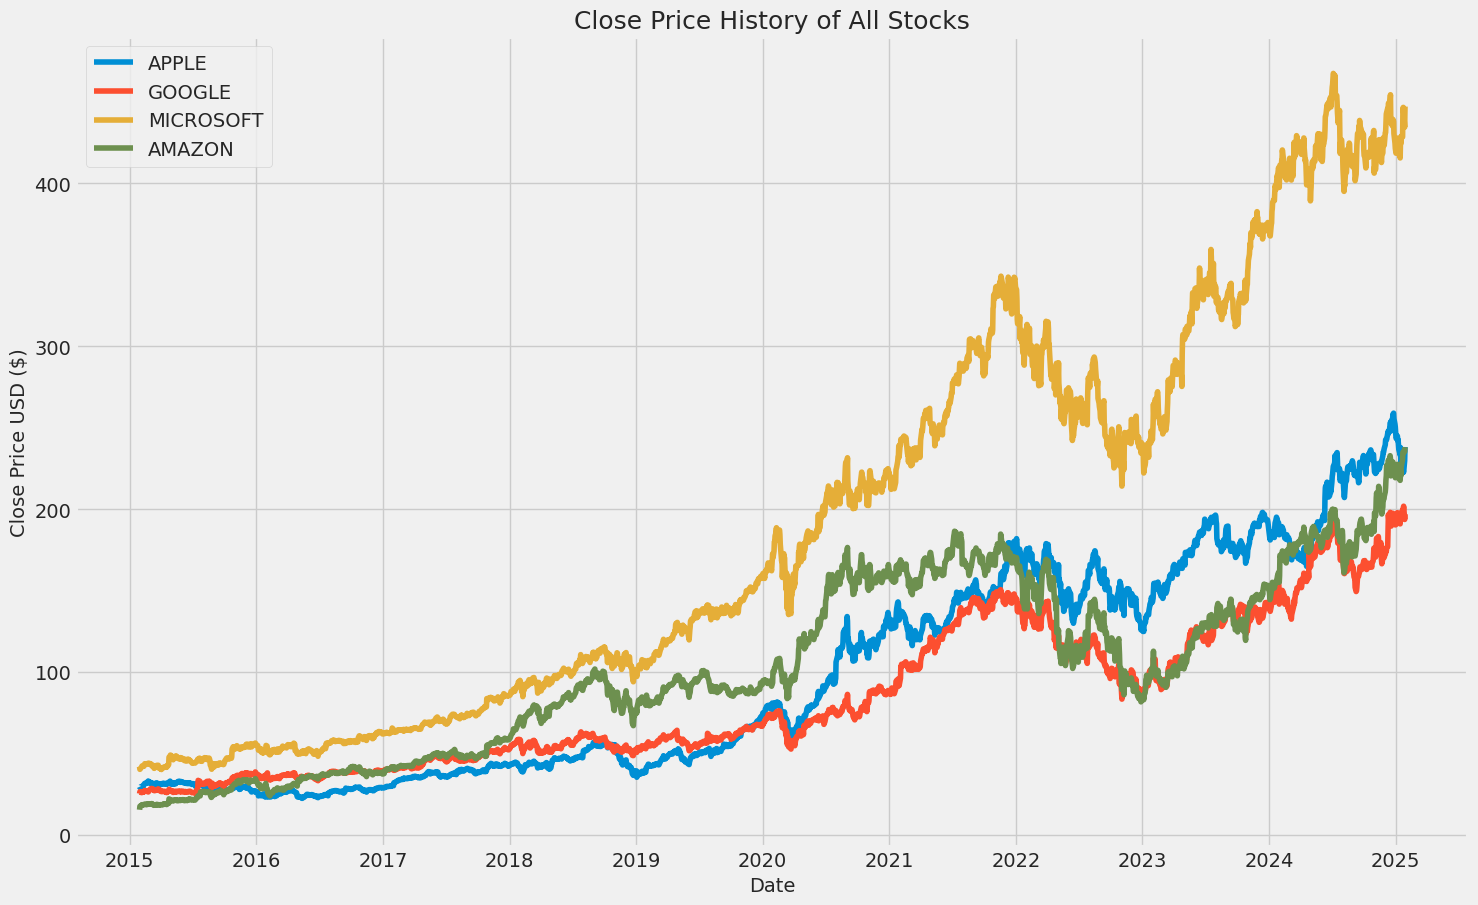

In [21]:
# Plot closing price history for all stocks
plt.figure(figsize=(16, 10))

for company_name, df in company_data.items():
    plt.plot(df['Close'], label=company_name)

plt.title('Close Price History of All Stocks', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.legend()
plt.show()
